<a href="https://colab.research.google.com/github/martinbzrd/landing/blob/main/DT_RF_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving DBHermes.csv to DBHermes.csv


{'DBHermes.csv': b'Date;Adj Close;Return;Price variation;Inflation;LVMH close stocks;Leather;CAC40;Sales (millions \xe2\x82\xac)\r\n01/01/2014;214.845978;;;0.6;110.735573;114.5;4408.080078;4119000\r\n01/02/2014;212.345139;-1.164%;DOWN;0.9;112.998077;116.6;4391.5;4119000\r\n01/03/2014;221.093094;4.120%;UP;0.6;110.568008;119.1;4487.390137;4119000\r\n01/04/2014;231.662735;4.781%;UP;0.7;118.779968;120.6;4519.569824;4119000\r\n01/05/2014;237.931366;2.706%;DOWN;0.7;123.967499;117.8;4422.839844;4119000\r\n01/06/2014;246.624985;3.654%;UP;0.5;119.593147;118.4;4246.140137;4119000\r\n01/07/2014;237.241806;-3.805%;DOWN;0.5;109.230682;119.4;4381.040039;4119000\r\n01/08/2014;240.735428;1.473%;UP;0.4;112.161072;125.2;4416.240234;4119000\r\n01/09/2014;217.659348;-9.586%;DOWN;0.3;109.31562;132.1;4233.089844;4119000\r\n01/10/2014;227.174805;4.372%;UP;0.5;114.964005;134.3;4390.180176;4119000\r\n01/11/2014;247.538651;8.964%;UP;0.3;122.735893;136.3;4272.75;4119000\r\n01/12/2014;271.028381;9.489%;UP;0.1;112

## Data preparation

In [ ]:
df = pd.read_csv("DBHermes.csv", delimiter=';')
df.head()

,Date,Adj Close,Return,Price variation,Inflation,LVMH close stocks,Leather,CAC40,Sales (millions €)
0,01/01/2014,214.845978,NaN,NaN,0.6,110.735573,114.5,4408.080078,4119000.0
1,01/02/2014,212.345139,-1.164%,DOWN,0.9,112.998077,116.6,4391.500000,4119000.0
2,01/03/2014,221.093094,4.120%,UP,0.6,110.568008,119.1,4487.390137,4119000.0
3,01/04/2014,231.662735,4.781%,UP,0.7,118.779968,120.6,4519.569824,4119000.0
4,01/05/2014,237.931366,2.706%,DOWN,0.7,123.967499,117.8,4422.839844,4119000.0


In [ ]:
df.isnull().sum().sum()

2

In [ ]:
df['Price variation'].fillna(value=df['Price variation'].mode())

0      DOWN
1      DOWN
2        UP
3        UP
4      DOWN
       ... 
116    DOWN
117      UP
118      UP
119    DOWN
120      UP
Name: Price variation, Length: 121, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                121 non-null    object 
 1   Adj Close           121 non-null    float64
 2   Return              120 non-null    object 
 3   Price variation     120 non-null    object 
 4   Inflation           121 non-null    float64
 5   LVMH close stocks   121 non-null    float64
 6   Leather             121 non-null    float64
 7   CAC40               121 non-null    float64
 8   Sales (millions €)  121 non-null    float64
dtypes: float64(6), object(3)
memory usage: 8.6+ KB


In [ ]:
df = df.drop('Date', axis=1)

In [ ]:
df = df.drop('Return', axis=1)

In [ ]:
df = df.drop('Adj Close', axis=1)

In [ ]:
df['Price variation'] = df['Price variation'].astype('category')
df = pd.get_dummies(df, columns=['Price variation'], drop_first=True)

## Data splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop('Price variation_UP' ,axis=1)
y = df['Price variation_UP']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.19, random_state=2)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier(max_depth = 4)

In [ ]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
y_pred = dtree.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[5 5]
 [7 6]]


              precision    recall  f1-score   support

       False       0.42      0.50      0.45        10
        True       0.55      0.46      0.50        13

    accuracy                           0.48        23
   macro avg       0.48      0.48      0.48        23
weighted avg       0.49      0.48      0.48        23



## Decision tree visualization

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
y.unique()

array([False,  True])

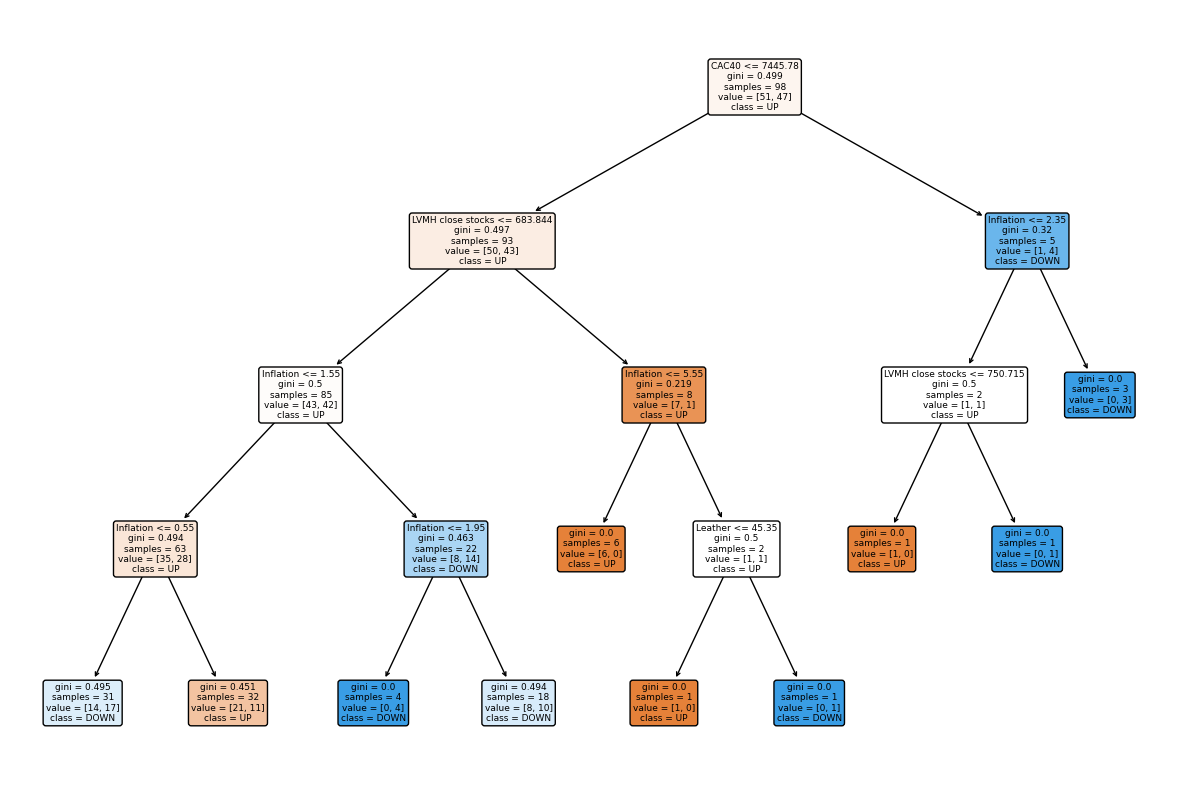

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtree,
               feature_names = x.columns,
               class_names=['UP', 'DOWN'],
               rounded=True,
               filled=True);

## Random Forest

In [ ]:
#MODEL BUILDING
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
y_pred= rf.predict(x_test)

In [ ]:
#PERFROMANCE MEASURE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test,y_pred))
print('\n')
print(classification_report(y_test,y_pred))

[[ 8  2]
 [12  1]]


              precision    recall  f1-score   support

       False       0.40      0.80      0.53        10
        True       0.33      0.08      0.12        13

    accuracy                           0.39        23
   macro avg       0.37      0.44      0.33        23
weighted avg       0.36      0.39      0.30        23

